In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

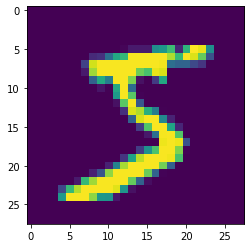

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train, x_test = x_train/255, x_test/255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
(28*28)/2

392.0

In [11]:
encoder = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(400, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
])

In [12]:
# 784 -> 400 -> 200 -> 100 -> 50 -> 25 
#                                     -> 50 -> 100 -> 200 -> 400 -> 784 -> reshape
decoder = Sequential([
    Dense(50, activation='relu', input_shape=[25]),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(400, activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape([28,28])
])

In [13]:
autoencoder = Sequential([encoder,decoder])

In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(1.5), metrics=['accuracy'])

In [15]:
autoencoder.fit(x_train,x_train, epochs=5, validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2534 - accuracy: 0.0865 - val_loss: 0.2177 - val_accuracy: 0.1172
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1882 - accuracy: 0.1548 - val_loss: 0.1666 - val_accuracy: 0.1838
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1598 - accuracy: 0.1955 - val_loss: 0.1520 - val_accuracy: 0.2051
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1488 - accuracy: 0.2112 - val_loss: 0.1445 - val_accuracy: 0.2182
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1426 - accuracy: 0.2213 - val_loss: 0.1399 - val_accuracy: 0.2183


In [16]:
pred = autoencoder.predict(x_test[:10])

Original Image


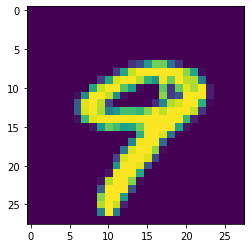

In [17]:
n=9
print("Original Image")
plt.imshow(x_test[n])

After Encoder attempted reconstruction


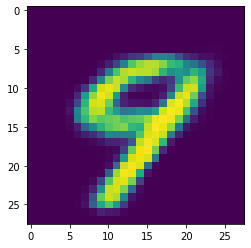

In [18]:
print("After Encoder attempted reconstruction")
plt.imshow(pred[n])

In [20]:
# Removing noise with Autoencoders :
from tensorflow.keras.layers import GaussianNoise

In [24]:
sample = GaussianNoise(stddev=0.2)

In [19]:
noisey = sample(x_test[:10], training=True)

In [25]:
n=0

Original Image : 


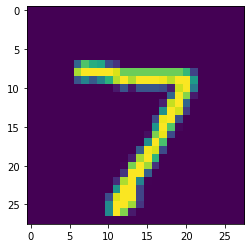

In [26]:
print("Original Image : ")
plt.imshow(x_test[n])

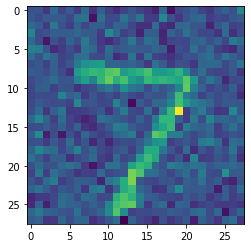

In [28]:
plt.imshow(noisey[n])

In [29]:
### Noise removal Autoencoder

In [30]:
import tensorflow as tf

In [31]:
encoder = Sequential([
    Flatten(input_shape=[28,28]),
    GaussianNoise(0.2),
    Dense(400, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
])


decoder = Sequential([
    Dense(50, activation='relu', input_shape=[25]),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(400, activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape([28,28])
])

In [32]:
noiseRemover = Sequential([encoder, decoder])

In [33]:
noiseRemover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
noiseRemover.fit(x_train, x_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1719 - accuracy: 0.1795
Epoch 2/8
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1321 - accuracy: 0.2285
Epoch 3/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1219 - accuracy: 0.2429
Epoch 4/8
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1167 - accuracy: 0.2531
Epoch 5/8
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1129 - accuracy: 0.2598
Epoch 6/8
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1101 - accuracy: 0.2652
Epoch 7/8
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1081 - accuracy: 0.2691
Epoch 8/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1065 - accuracy: 0.2717


In [36]:
_noisyImages = sample(x_test[:10], training=True)

In [37]:
denoisedImages = noiseRemover(_noisyImages)

In [42]:
n=9

Original Image : 


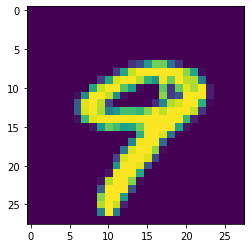

In [43]:
print("Original Image : ")
plt.imshow(x_test[n])

Noise added Images : 


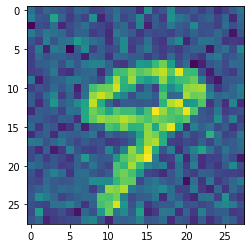

In [45]:
print("Noise added Images : ")
plt.imshow(_noisyImages[n])

Ater noise removal Autoencoder : 


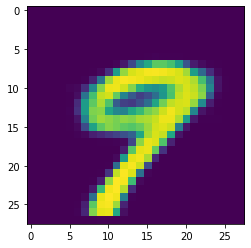

In [46]:
print("Ater noise removal Autoencoder : ")
plt.imshow(denoisedImages[n])